## 파이썬 머신러닝
# 랜덤 포레스트 (Random Forest)

- 여러가지 머신러닝 모델을 연결하여 사용하는 것을 **앙상블(ensemble)** 방법이라고 합니다.
- 결정트리를 사용한 앙상블에는 **랜덤 포레스트**와 **그래디언트 부스팅** 두가지 방법이 유명합니다.
- 랜덤 포레스트는 **결정트리를 여러개 만들고**(나무가 여러개이므로 포레스트) 각 결정트리마다 무작위성(랜덤)을 부여하여 생성합니다. 이렇게 나온 여러개의 결정트리의 **결과를 평균**하여 최종 결과를 냅니다.
- 이는 결정트리의 과대적합 경향을 줄이고, 다양한 속성을 고려하게 된다는 의미가 됩니다.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier

cancer = load_breast_cancer()

C:\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d


In [2]:
X_train, X_test, y_train, y_test = train_test_split(cancer.data, cancer.target)

model = RandomForestClassifier(n_estimators=100) # default is 10
model.fit(X_train, y_train)

train_score = model.score(X_train, y_train)
test_score = model.score(X_test, y_test)
display(train_score, test_score)

1.0

0.958041958041958

In [3]:
model

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

- 결과에서 보듯이 커널 SVM 보다 조금 더 좋은 성능을 보이는 것 같습니다.
- 나무의 갯수를 정하는 것은 **n_estimators** 속성입니다. 나무의 갯수가 많을 수록 좀 더 일반화 되고 점수가 높아지는 경향이 있습니다.
- 랜덤 포레스트 명칭에서 **랜덤** 의 의미를 설명하겠습니다. 먼저 전체 샘플이 1000개 라면 1000개의 샘플을 무작위로 뽑습니다. 다만 같은 샘플이 반복해 선택될 수 있습니다(**부트스트랩 샘플**, 주머니에서 공을 꺼낸 후 다시 집어넣는다). 그리고 **max_features** 속성을 사용하여 각 노드에서 판단에 사용할 속성들을 무작위로 선정합니다.

In [4]:
help(model)

Help on RandomForestClassifier in module sklearn.ensemble.forest object:

class RandomForestClassifier(ForestClassifier)
 |  RandomForestClassifier(n_estimators=10, criterion='gini', max_depth=None, min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto', max_leaf_nodes=None, min_impurity_decrease=0.0, min_impurity_split=None, bootstrap=True, oob_score=False, n_jobs=1, random_state=None, verbose=0, warm_start=False, class_weight=None)
 |  
 |  A random forest classifier.
 |  
 |  A random forest is a meta estimator that fits a number of decision tree
 |  classifiers on various sub-samples of the dataset and use averaging to
 |  improve the predictive accuracy and control over-fitting.
 |  The sub-sample size is always the same as the original
 |  input sample size but the samples are drawn with replacement if
 |  `bootstrap=True` (default).
 |  
 |  Read more in the :ref:`User Guide <forest>`.
 |  
 |  Parameters
 |  ----------
 |  n_estimators : inte

In [4]:
trees = model.estimators_
len(trees), trees[0]

(100,
 DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
             max_features='auto', max_leaf_nodes=None,
             min_impurity_decrease=0.0, min_impurity_split=None,
             min_samples_leaf=1, min_samples_split=2,
             min_weight_fraction_leaf=0.0, presort=False,
             random_state=1732064658, splitter='best'))

In [5]:
trees[0].predict(X_test)

array([1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 0.,
       1., 1., 0., 0., 1., 0., 1., 1., 1., 0., 0., 1., 1., 1., 0., 1., 0.,
       1., 1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1.,
       1., 0., 1., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 0., 0., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 0., 0., 1.,
       1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0., 0., 0.,
       0., 1., 1., 1., 0., 1., 1., 1., 0., 0., 1., 1., 1., 0., 1., 1., 0.,
       0., 1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0.,
       1., 1., 0., 1., 1., 1., 0.])

In [6]:
trees[-1].predict(X_test)

array([1., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 0.,
       1., 1., 0., 0., 1., 0., 1., 1., 1., 0., 0., 1., 1., 1., 0., 1., 0.,
       0., 1., 1., 0., 1., 0., 1., 0., 1., 0., 0., 0., 0., 1., 0., 0., 1.,
       0., 1., 1., 1., 0., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 0., 1.,
       0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1.,
       1., 0., 1., 1., 1., 1., 1., 1., 0., 0., 0., 1., 1., 0., 0., 0., 0.,
       0., 1., 1., 1., 0., 1., 1., 1., 0., 0., 1., 1., 1., 0., 1., 1., 1.,
       0., 1., 1., 0., 1., 0., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 0.,
       0., 0., 0., 1., 1., 1., 0.])

In [3]:
X = cancer.data[:,[0,1]]
y = cancer.target
X_train, X_test, y_train, y_test = train_test_split(X, y)

model = RandomForestClassifier(n_estimators=1000, max_features=2, max_depth=2) # default is 10
model.fit(X_train, y_train)

display(model.score(X_train, y_train), model.score(X_test, y_test))

0.9014084507042254

0.8811188811188811

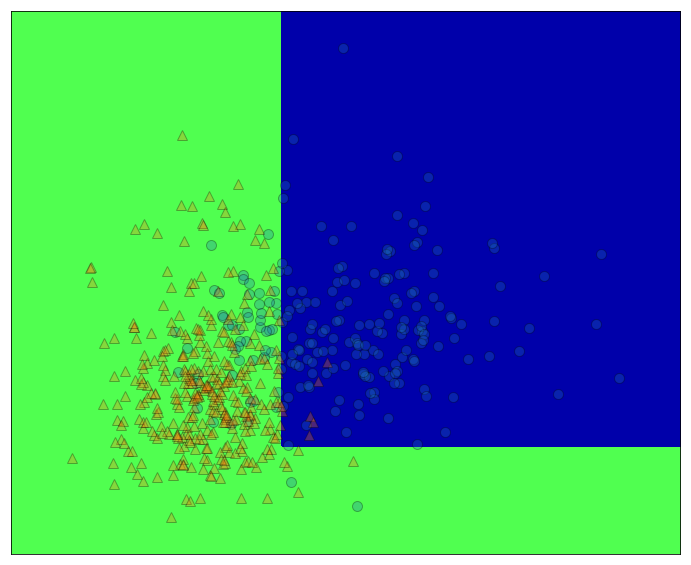

In [4]:
import mglearn

plt.figure(figsize=[12,10])
mglearn.plots.plot_2d_classification(model, X)
mglearn.discrete_scatter(X[:,0], X[:,1], y, alpha=0.3)

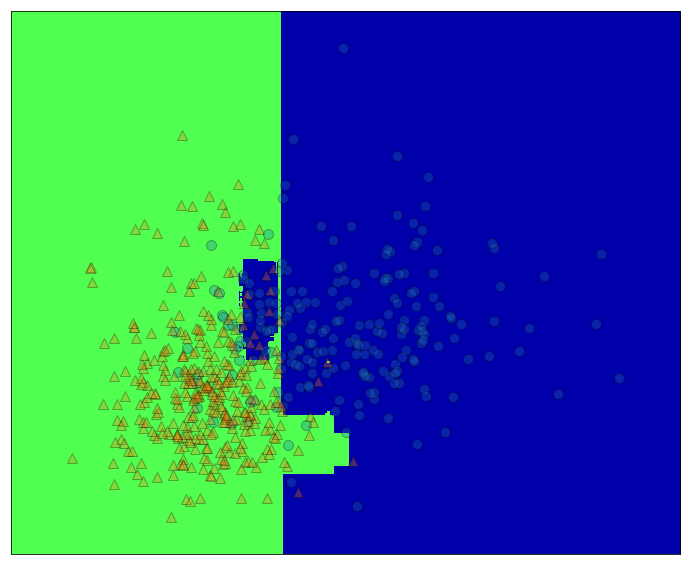

In [8]:
import mglearn

plt.figure(figsize=[12,10])
mglearn.plots.plot_2d_classification(model, X)
mglearn.discrete_scatter(X[:,0], X[:,1], y, alpha=0.3)

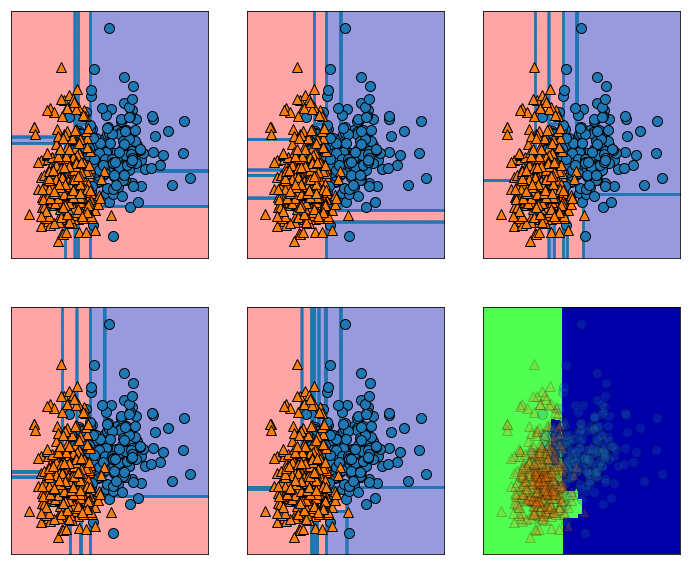

In [9]:
plt.figure(figsize=[12,10])
for i in range(5):
    plt.subplot(2, 3, i+1)
    mglearn.plots.plot_tree_partition(X, y, model.estimators_[i])
    
plt.subplot(2,3,6)
mglearn.plots.plot_2d_classification(model, X)
mglearn.discrete_scatter(X[:,0], X[:,1], y, alpha=0.2)

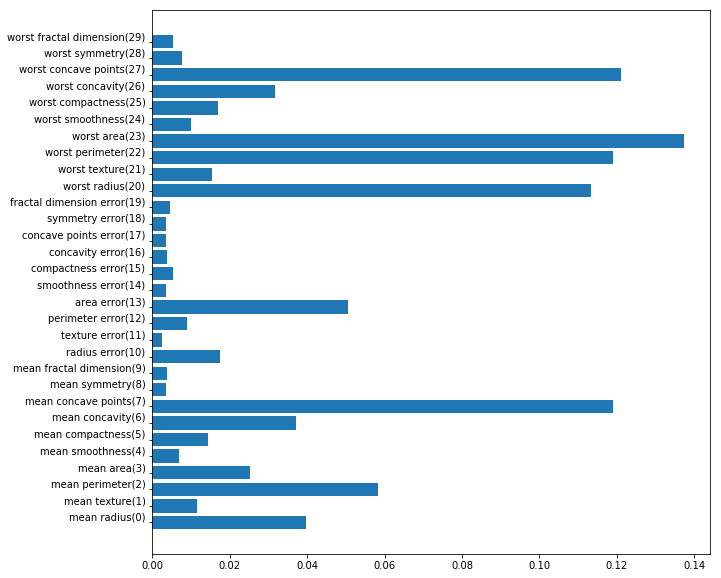

In [10]:
model = RandomForestClassifier(n_estimators=100, max_depth=5) # default is 10
model.fit(cancer.data, cancer.target)

# 랜덤 포레스트 모델 생성시 가장 중요하게 영향을 끼친 속성
weight = model.feature_importances_

plt.figure(figsize=[10,10])
plt.barh(range(30),weight)
plt.yticks(range(30),['%s(%d)' % (s,i) for i,s in enumerate(cancer.feature_names)],va='bottom')
print('')